/tmp/ipykernel_14436/3419664159.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


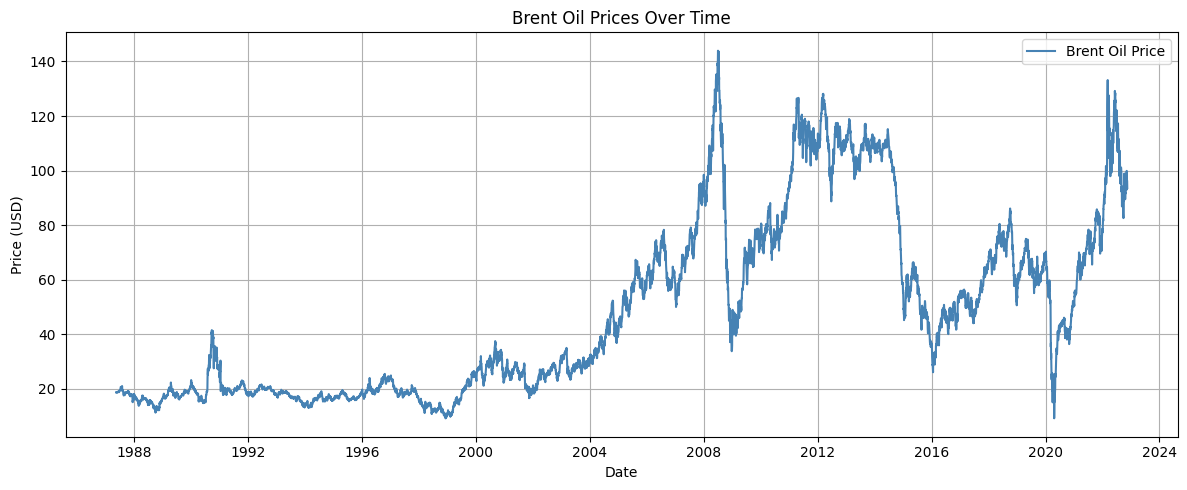

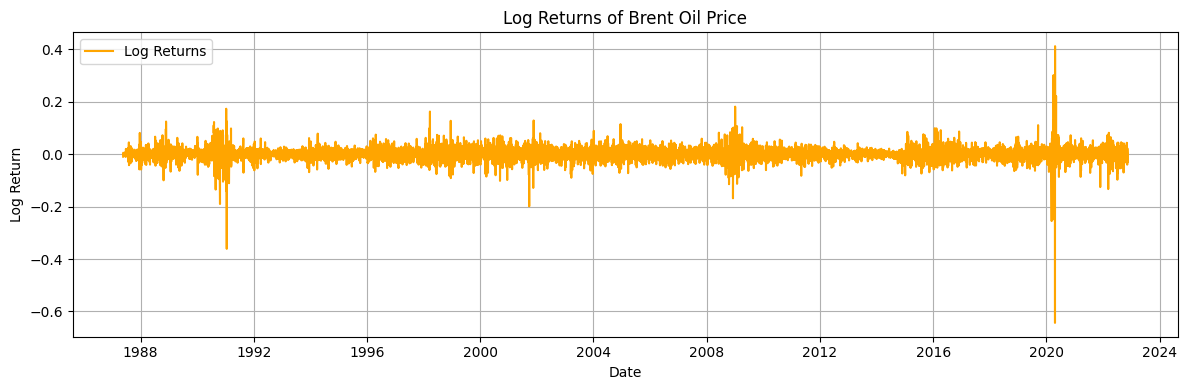

ADF Statistic: -16.427113494485962
p-value: 2.4985801611426027e-29
Critical Values:
  1%: -3.4310783342658615
  5%: -2.861861876398633
  10%: -2.566941329781918

✅ The log return series is stationary (reject H0).


In [5]:
# === Imports ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# === 1. Load and Prepare Data ===
df = pd.read_csv("../data/raw/BrentOilPrices.csv")  # <- Update path if needed
df.columns = [col.strip().lower() for col in df.columns]
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)

# Plot raw prices
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['price'], label="Brent Oil Price", color='steelblue')
plt.title("Brent Oil Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === 2. Compute Log Returns ===
df['log_return'] = np.log(df['price']) - np.log(df['price'].shift(1))
df.dropna(inplace=True)

# Plot log returns
plt.figure(figsize=(12, 4))
plt.plot(df['date'], df['log_return'], color='orange', label='Log Returns')
plt.title("Log Returns of Brent Oil Price")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === 3. Stationarity Test (ADF Test) ===
adf_result = adfuller(df['log_return'])

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"  {key}: {value}")

if adf_result[1] < 0.05:
    print("\n✅ The log return series is stationary (reject H0).")
else:
    print("\n⚠️ The log return series is non-stationary (fail to reject H0).")
